In [156]:
import pandas as pd
import numpy as py
import warnings
import pandas as pd
from plotnine import *
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.option_context('display.max_colwidth', -1)
pd.options.display.float_format = "{:.2f}".format
import altair as alt
from vega_datasets import data



In [115]:
df = pd.read_excel("parliament_EDIT.xlsx")

###### The column titles all come in Title case so I needed to change to get to all lower case -->

In [116]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

###### The names of the projects were in all caps making it difficult to read so we have to lower them to enhance readability. 

In [117]:
df['project'] = df['project'].apply(lambda x:x.lower())

In [118]:
df = df.drop(['euro_exemptions', 'cedi_exemptions'], axis=1)

###### To ensure we can use the date column for charts, we have to convert into datetime

In [119]:
#converting date into datetime

df['date']= pd.to_datetime(df['date'])

#### Ghana's political system is dominated by two parties, NPP and NDC. 
They each have all been in power at various times and have pushed various exemptions.
Grouping exemptions into NPP/NDC allows us to see who gave more exemptions.


In [120]:
#Exemptions sponsored by NPP
npp_exemptions = df[df['party'] == 'NPP']
npp_exemptions

,project,sector,dollar_exemptions,date,sponsor,party
0,electrification of 582 communities in the asha...,Power,31016771.00,2022-11-19,Prof Yaw Gyan Baffuor,NPP
1,project materials and equipment to be procured...,Health,4672776.14,2019-04-01,Kwaku Kwarteng,NPP
2,yedent agro bulk processing company under the ...,Agro,222151.00,2019-06-01,Ken Ofori Atta,NPP
3,construction/rehabilitation of selected roads ...,Roads,69217840.24,2019-04-01,Kwaku Agyeman Kwarteng,NPP
4,the development of an integrated container and...,Transport,65248397.60,2019-04-01,Ken Ofori Atta,NPP
5,the integrated national security communication...,Communications,49966503.86,2019-10-01,Ken Ofori Atta and Albert Kan Dapaah,NPP
6,completion of the university of ghana medical ...,Health,5983540.97,2019-10-01,Osei Kyei Bonsu,NPP
7,modernisation and equipping of the tetteh quar...,Health,7563932.00,2019-10-01,Abena Osei Asare,NPP
8,"the design, construction and commissioning of ...",Water & Sanitation,53506830.74,2019-11-01,Ken Ofori Atta,NPP
9,implementatation of the e-zwich rural branchle...,Communications,13472373.00,2019-11-01,Abena Osei Asare,NPP


In [121]:
ndc_exemptions = df[df['party'] == 'NDC']
ndc_exemptions

,project,sector,dollar_exemptions,date,sponsor,party
61,the supply and installation of integrrated lab...,Education,2604916.88,2016-12-01,Seth E Terkper,NDC
65,construction of a 340 mw independent power pla...,Power,57501825.00,2014-10-01,Cassiel Ato Baah Forson,NDC
66,african development bank(afdb) funded institut...,Others,NaN,2014-10-01,Cassiel Ato Baah Forson,NDC
67,"design, construction and equipping of the univ...",Health,16912684.00,2014-12-01,Cassiel Ato Baah Forson,NDC
68,"design, construction procurement and installat...",Health,60697914.66,2014-12-01,Cassiel Ato Baah Forson,NDC
69,the university of health and allied sciences a...,Education,1591168.78,2014-12-01,Cassiel Ato Baah Forson,NDC
70,"the ""accelerating tuberculosis(tb) case detect...",Health,2249252.25,2015-06-01,Cassiel Ato Baah Forson,NDC
71,materials and equipment including withholding ...,Others,2947500.00,2014-03-01,Cassiel Ato Baah Forson,NDC
72,the wa water supply system development project,Water & Sanitation,3572568.00,2016-03-01,Cassiel Ato Baah Forson,NDC
73,the 203mw combined cycle power project,Power,29837897.97,2015-12-01,Seth E Terkper,NDC


In [122]:
df.sort_values(['dollar_exemptions'], ascending=False).groupby('sector').head(3)


,project,sector,dollar_exemptions,date,sponsor,party
63,the direct epc cost in respect of the 400mw co...,Power,92406226.88,2017-10-01,Ken Ofori Atta,NPP
3,construction/rehabilitation of selected roads ...,Roads,69217840.24,2019-04-01,Kwaku Agyeman Kwarteng,NPP
41,the national electrification scheme(nes) and t...,Power,66681968.00,2018-02-01,Ken Ofori Atta,NPP
4,the development of an integrated container and...,Transport,65248397.60,2019-04-01,Ken Ofori Atta,NPP
68,"design, construction procurement and installat...",Health,60697914.66,2014-12-01,Cassiel Ato Baah Forson,NDC
65,construction of a 340 mw independent power pla...,Power,57501825.00,2014-10-01,Cassiel Ato Baah Forson,NDC
17,redevelopment and modernization of the kumasi ...,Infrastructure,55970237.52,2019-11-01,Abena Osei Asare,NPP
8,"the design, construction and commissioning of ...",Water & Sanitation,53506830.74,2019-11-01,Ken Ofori Atta,NPP
25,the tamale water supply project,Water & Sanitation,53506830.74,2019-10-01,Ken Ofori Atta,NPP
34,personal emoluments of health workers for apri...,Health,51551429.17,2020-04-01,Osei Kyei Mensah Bonsu,NPP


In [123]:
#Creating a date column
df['year'] = df['date'].dt.year

In [176]:
df.dtypes

project                      object
sector                       object
dollar_exemptions           float64
date                 datetime64[ns]
sponsor                      object
party                        object
year                        float64
dtype: object

In [124]:
df

,project,sector,dollar_exemptions,date,sponsor,party,year
0,electrification of 582 communities in the asha...,Power,31016771.00,2022-11-19,Prof Yaw Gyan Baffuor,NPP,2022.00
1,project materials and equipment to be procured...,Health,4672776.14,2019-04-01,Kwaku Kwarteng,NPP,2019.00
2,yedent agro bulk processing company under the ...,Agro,222151.00,2019-06-01,Ken Ofori Atta,NPP,2019.00
3,construction/rehabilitation of selected roads ...,Roads,69217840.24,2019-04-01,Kwaku Agyeman Kwarteng,NPP,2019.00
4,the development of an integrated container and...,Transport,65248397.60,2019-04-01,Ken Ofori Atta,NPP,2019.00
5,the integrated national security communication...,Communications,49966503.86,2019-10-01,Ken Ofori Atta and Albert Kan Dapaah,NPP,2019.00
6,completion of the university of ghana medical ...,Health,5983540.97,2019-10-01,Osei Kyei Bonsu,NPP,2019.00
7,modernisation and equipping of the tetteh quar...,Health,7563932.00,2019-10-01,Abena Osei Asare,NPP,2019.00
8,"the design, construction and commissioning of ...",Water & Sanitation,53506830.74,2019-11-01,Ken Ofori Atta,NPP,2019.00
9,implementatation of the e-zwich rural branchle...,Communications,13472373.00,2019-11-01,Abena Osei Asare,NPP,2019.00


In [129]:
df.to_csv("parliament_refined.csv", index=False)

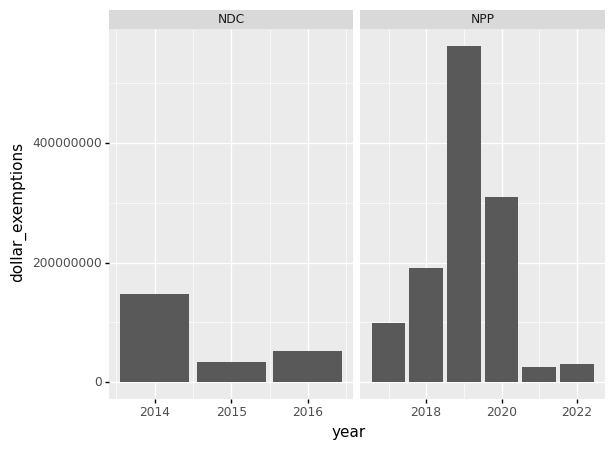

<ggplot: (344218116)>

In [154]:
( 
    ggplot(df.dropna(), aes(x='year', y='dollar_exemptions'))
    + geom_bar(stat='identity') 
    + facet_wrap('party', scales='free_x')
    
    
)


In [185]:
year_sum = df.groupby(by='year').dollar_exemptions.sum().round()

year_sum = year_sum.reset_index()


In [196]:
year_sum['percent']

0   10.18
1    2.29
2    3.58
3    6.82
4   13.20
5   38.76
6   21.33
7    1.70
8    2.14
Name: percent, dtype: float64

In [195]:
year_sum

,year,dollar_exemptions,percent
0,2014.00,147555514.00,10.18
1,2015.00,33227359.00,2.29
2,2016.00,51975019.00,3.58
3,2017.00,98906227.00,6.82
4,2018.00,191356498.00,13.20
5,2019.00,562025334.00,38.76
6,2020.00,309264765.00,21.33
7,2021.00,24641365.00,1.70
8,2022.00,31016771.00,2.14


In [179]:
# import altair as alt
# import pandas as pd

# source = pd.DataFrame({
#     'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
#     'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
# })

# alt.Chart(source).mark_bar().encode(
#     x='a',
#     y='b'
    
    
    
import altair as alt
import pandas as pd

source = df

alt.Chart(df).mark_bar().encode(
    x='year',
    y='dollar_exemptions')

alt.Chart(...)

In [209]:
yearly_sector = df.groupby(['year', 'sector']).sum()
yearly_sector.to_csv("yearly_sector.csv")

In [211]:


source = yearly_sector

alt.Chart(yearly_sector).mark_bar().encode(
    x='dollar_exemptions',
    y='year',
    color='sector')

ValueError: Hierarchical indices not supported

alt.Chart(...)